<a id='top'></a>
# Challenge Set 5
Topic:        Classification  
Date:         8/1/2016  
Name:         Whitney Chia  
Worked with:  All by myyyyyyyself

[Question 1](#question1)   
[Question 2](#question2)   
[Question 3](#question3)   
[Question 4](#question4)  
[Question 5](#question5)   
[Question 6](#question6)   
[Question 7](#question7)   
[Question 8](#question8)  
[Question 9](#question9)   
[Question 10](#question10)     
[Question 11](#question11)   
[Question 12](#question12)  

<a id='question1'></a>
# Question 1   
[Top](#top)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from patsy import dmatrices
import statsmodels.api as sm
pd.options.display.max_rows = 999
plt.style.use('ggplot')
sns.set_context('poster')
sns.set_style('darkgrid')
sns.set_palette('dark')
import matplotlib.patches as mpatches

In [4]:
df = pd.read_csv('house-votes-84.data', header=None)

In [5]:
df.columns = ['Party','handicapped_infants', 'water_project_cost_sharing',\
        'adoption_of_the_budget_resolution', 'physician_fee_freeze', 'el_salvador_aid',\
             'religious_groups_in_schools', 'anti_satellite_test_ban', 'aid_to_nicaraguan_contras',\
             'mx_missile', 'immigration', 'synfuels_corporation_cutback', 'education_spending', 'superfund_right_to_sue',\
             'crime', 'duty_free_exports', 'export_administration_act_south_africa']

In [6]:
df = df.replace(['republican', 'democrat', 'y','n', '?'], [0,1,1,0, np.nan])

In [7]:
df = df.astype(float)

In [8]:
df = df.fillna(df.mean())

# <a id='question2'></a>
# Question 2   
[Top](#top)

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation as cv
from patsy import dmatrices

In [10]:
df.head()

,Party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,0.0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,0.0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,1.0,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,1.0,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,1.0,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [11]:
y, X = dmatrices('Party ~ handicapped_infants + water_project_cost_sharing\
        + adoption_of_the_budget_resolution + physician_fee_freeze + el_salvador_aid\
             + religious_groups_in_schools + anti_satellite_test_ban + aid_to_nicaraguan_contras\
             + mx_missile + immigration + synfuels_corporation_cutback + education_spending + superfund_right_to_sue\
             + crime + duty_free_exports + export_administration_act_south_africa', data=df, return_type='dataframe')

In [12]:
x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=.30, random_state=4444)

# <a id='question3'></a>
# Question 3   
[Top](#top)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [14]:
for i in range(1,21):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train, y_train)
    pred = KNN.predict(x_test)
    print 'The accuracy score when K is ' + str(i) + ' is: ' + str(accuracy_score(y_test, pred))

The accuracy score when K is 1 is: 0.900763358779
The accuracy score when K is 2 is: 0.916030534351
The accuracy score when K is 3 is: 0.900763358779
The accuracy score when K is 4 is: 0.931297709924
The accuracy score when K is 5 is: 0.916030534351
The accuracy score when K is 6 is: 0.916030534351
The accuracy score when K is 7 is: 0.916030534351
The accuracy score when K is 8 is: 0.916030534351
The accuracy score when K is 9 is: 0.931297709924
The accuracy score when K is 10 is: 0.916030534351
The accuracy score when K is 11 is: 0.923664122137
The accuracy score when K is 12 is: 0.923664122137
The accuracy score when K is 13 is: 0.923664122137
The accuracy score when K is 14 is: 0.923664122137
The accuracy score when K is 15 is: 0.923664122137
The accuracy score when K is 16 is: 0.923664122137
The accuracy score when K is 17 is: 0.923664122137
The accuracy score when K is 18 is: 0.908396946565
The accuracy score when K is 19 is: 0.916030534351
The accuracy score when K is 20 is: 0.91

/Users/whitneychia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/Users/whitneychia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/Users/whitneychia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/Users/whitneychia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

The K value with the highest accuracy score is 4 or 9, which have an accuracy score of 0.931297709924.

# <a id='question4'></a>
# Question 4   
[Top](#top)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logreg = LogisticRegression(C=10)
logreg.fit(x_train, y_train)
pred = logreg.predict(x_test)
print 'the accuracy_score of logistic regression is: ' + str(accuracy_score(y_test, pred))

the accuracy_score of logistic regression is: 0.93893129771


/Users/whitneychia/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# <a id='question5'></a>
# Question 5  
[Top](#top)

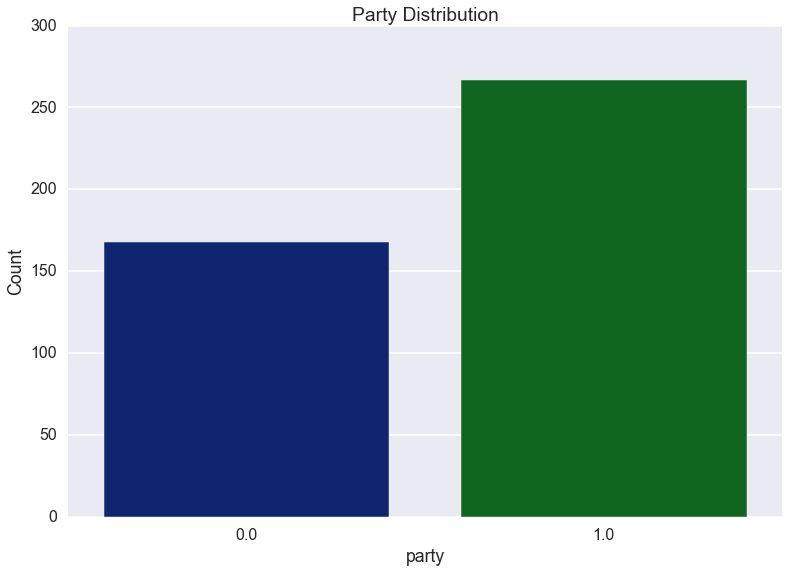

In [17]:
figsize = (4, 5)

ax = sns.countplot(df['Party'], data=df)
ax.set(xlabel="party",ylabel="Count",title = "Party Distribution")

In [18]:
print 'There are ' + str(len(df[df['Party'] == 1])) + ' democrats and '\
+ str(len(df[df['Party'] == 0])) + ' republicans.'
print 'This means you are 61.38% likely to be democrat and 38.62% republican with a random guess.'

There are 267 democrats and 168 republicans.
This means you are 61.38% likely to be democrat and 38.62% republican with a random guess.


In [19]:
def pred_democrat(X):
    dem_array = np.ones(len(X,))
    return dem_array

In [20]:
print accuracy_score(y_test, pred_democrat(y_test))
print 'This is about in line with our assumption that you would be democrat 61.38% of the times.'

0.587786259542
This is about in line with our assumption that you would be democrat 61.38% of the times.


In [21]:
def pred_republican(X):
    rep_array = np.zeros(len(X,))
    return rep_array

In [22]:
print accuracy_score(y_test, pred_republican(y_test))
print 'This is about in line with our assumption that you would be republican 38.62% of the times.'

0.412213740458
This is about in line with our assumption that you would be republican 38.62% of the times.


# <a id='question6'></a>
# Question 6  
[Top](#top)

In [23]:
log_reg_acc = np.array(0.93893129771)
log_reg_acc = np.repeat(log_reg_acc, 20)

In [24]:
KNN_acc =(0.900763358779 ,0.916030534351 ,0.900763358779 ,0.931297709924 ,0.916030534351\
          ,0.916030534351 ,0.916030534351 ,0.916030534351 ,0.931297709924 ,0.916030534351\
          ,0.923664122137 ,0.923664122137 ,0.923664122137 ,0.923664122137 ,0.923664122137\
          ,0.923664122137 ,0.923664122137 ,0.908396946565 ,0.916030534351 ,0.916030534351)

In [25]:
y_values = ([log_reg_acc, KNN_acc])
x_values = (0,20)

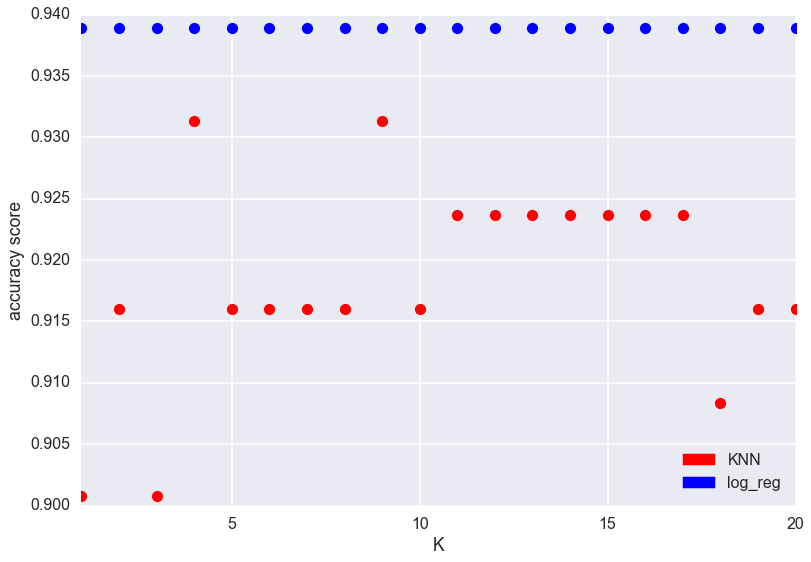

In [26]:
plt.xlabel('K') 
plt.ylabel('accuracy score')
ax=plt.subplot(111)
ax.set_xlim(1, 20)
dim=np.arange(1,21,1)
ax.plot(np.append(np.roll(KNN_acc,1),KNN_acc[1]),'ro', color='r', linewidth=1.0, label="Accuracy Score")
ax.plot(np.append(np.roll(log_reg_acc,1),log_reg_acc[1]),'ro', color='b', linewidth=1.0, label="Accuracy Score")
KNN = mpatches.Patch(color='red', label='KNN')
log_reg = mpatches.Patch(color='blue', label='log_reg')
plt.legend(handles=[KNN, log_reg], loc=0)
plt.show()

# <a id='question7'></a>
# Question 7  
[Top](#top)

In [27]:
from sklearn.learning_curve import learning_curve

In [28]:
log_learn = learning_curve(logreg, df.values[:,1:], df.values[:,0], train_sizes = np.linspace(0.1, 1.0, 80))
log_learn

(array([ 29,  32,  35,  38,  42,  45,  48,  52,  55,  58,  62,  65,  68,
         71,  75,  78,  81,  85,  88,  91,  95,  98, 101, 104, 108, 111,
        114, 118, 121, 124, 128, 131, 134, 138, 141, 144, 147, 151, 154,
        157, 161, 164, 167, 171, 174, 177, 180, 184, 187, 190, 194, 197,
        200, 204, 207, 210, 214, 217, 220, 223, 227, 230, 233, 237, 240,
        243, 247, 250, 253, 256, 260, 263, 266, 270, 273, 276, 280, 283,
        286, 290]), array([[ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
    

In [29]:
train_cv_log_reg_err = np.mean(log_learn[1], axis=1)
test_cv_log_reg_err = np.mean(log_learn[2], axis=1)
m = log_learn[0]

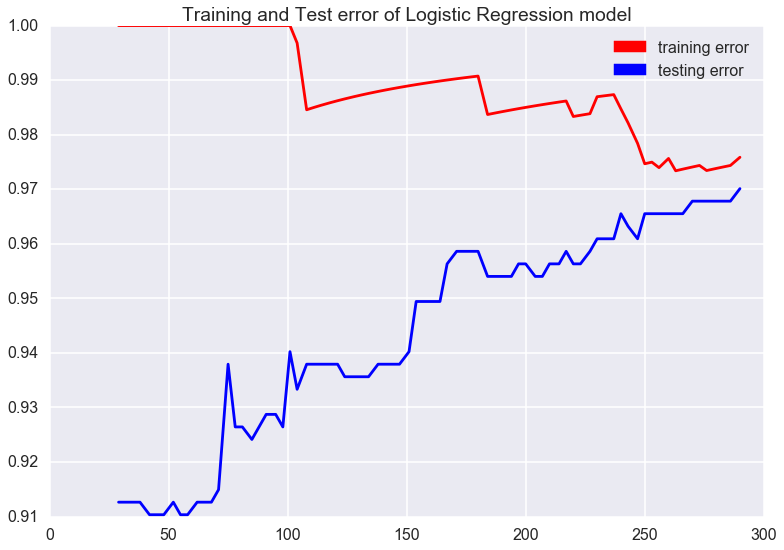

In [30]:
plt.plot(m, train_cv_log_reg_err, 'red')
plt.plot(m, test_cv_log_reg_err, 'blue')
red = mpatches.Patch(color='red', label='training error')
blue = mpatches.Patch(color='blue', label='testing error')
plt.legend(handles=[red, blue], loc = 0 )
plt.title('Training and Test error of Logistic Regression model')

In [31]:
model = KNeighborsClassifier(n_neighbors=9)
knn_learn = learning_curve(model, df.values[:,1:], df.values[:,0], train_sizes =np.linspace(0.1, 1.0, 100))
knn_learn

(array([ 29,  31,  34,  36,  39,  42,  44,  47,  50,  52,  55,  58,  60,
         63,  65,  68,  71,  73,  76,  79,  81,  84,  87,  89,  92,  94,
         97, 100, 102, 105, 108, 110, 113, 116, 118, 121, 123, 126, 129,
        131, 134, 137, 139, 142, 145, 147, 150, 152, 155, 158, 160, 163,
        166, 168, 171, 174, 176, 179, 181, 184, 187, 189, 192, 195, 197,
        200, 203, 205, 208, 210, 213, 216, 218, 221, 224, 226, 229, 231,
        234, 237, 239, 242, 245, 247, 250, 253, 255, 258, 261, 263, 266,
        268, 271, 274, 276, 279, 282, 284, 287, 290]),
 array([[ 0.82758621,  0.89655172,  0.89655172],
        [ 0.83870968,  0.90322581,  0.90322581],
        [ 0.82352941,  0.91176471,  0.91176471],
        [ 0.83333333,  0.91666667,  0.91666667],
        [ 0.84615385,  0.92307692,  0.92307692],
        [ 0.85714286,  0.92857143,  0.92857143],
        [ 0.86363636,  0.93181818,  0.93181818],
        [ 0.85106383,  0.93617021,  0.93617021],
        [ 0.86      ,  0.94      ,  0.94  

In [32]:
train_cv_knn_err = np.mean(knn_learn[1], axis=1)
test_cv_knn_err = np.mean(knn_learn[2], axis=1)
m = knn_learn[0]

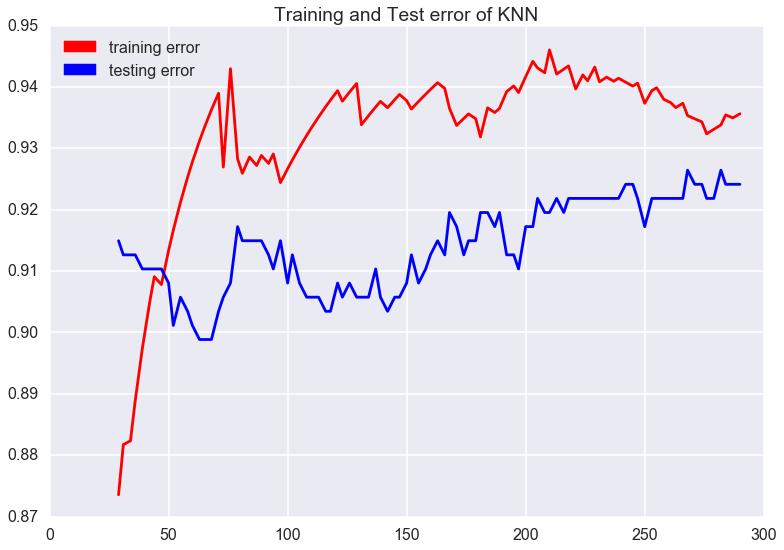

In [33]:
plt.plot(m, train_cv_knn_err, 'red')
plt.plot(m, test_cv_knn_err, 'blue')
green = mpatches.Patch(color='red', label='training error')
blue = mpatches.Patch(color='blue', label='testing error')
plt.legend(handles=[green, blue], loc = 0 )
plt.title('Training and Test error of KNN')

# <a id='question8'></a>
# Question 8  
[Top](#top)

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [35]:
NB = GaussianNB()
NB.fit(x_train, y_train)
pred = NB.predict(x_test)
print 'the accuracy_score of Naive Bayes is: ' + str(accuracy_score(y_test, pred))

the accuracy_score of Naive Bayes is: 0.93893129771


/Users/whitneychia/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
SVC = SVC()
SVC.fit(x_train, y_train)
pred = SVC.predict(x_test)
print 'the accuracy_score of Support Vector Classifier is: ' + str(accuracy_score(y_test, pred))

the accuracy_score of Support Vector Classifier is: 0.954198473282


/Users/whitneychia/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


In [37]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
print 'the accuracy_score of Naive Bayes is: ' + str(accuracy_score(y_test, pred))

the accuracy_score of Naive Bayes is: 0.946564885496


In [38]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
print 'the accuracy_score of Naive Bayes is: ' + str(accuracy_score(y_test, pred))

the accuracy_score of Naive Bayes is: 0.961832061069


/Users/whitneychia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


# <a id='question9'></a>
# Question 9  
[Top](#top)

In [39]:
from sklearn.cross_validation import cross_val_score

In [40]:
KNN = KNeighborsClassifier(n_neighbors=9)
lr_cross_val = cross_val_score(logreg, df.values[:,1:], df.values[:,0])
knn_cross_val = cross_val_score(KNN, df.values[:,1:], df.values[:,0])
NB_cross_val = cross_val_score(NB, df.values[:,1:], df.values[:,0])
svc_cross_val = cross_val_score(SVC, df.values[:,1:], df.values[:,0])
dtc_cross_val = cross_val_score(DTC, df.values[:,1:], df.values[:,0])
rfc_cross_val = cross_val_score(RFC, df.values[:,1:], df.values[:,0])

In [41]:
print 'The accuracy through cross_val for logistic regression is: ' + str(np.mean(lr_cross_val))
print 'The accuracy through cross_val for KNN is: ' + str(np.mean(knn_cross_val))
print 'The accuracy through cross_val for Naive Bayes is: ' + str(np.mean(NB_cross_val))
print 'The accuracy through cross_val for SVC is: ' + str(np.mean(svc_cross_val))
print 'The accuracy through cross_val for Decision Tree is: ' + str(np.mean(dtc_cross_val))
print 'The accuracy through cross_val for logistic Random Forest is: ' + str(np.mean(rfc_cross_val))

The accuracy through cross_val for logistic regression is: 0.970114942529
The accuracy through cross_val for KNN is: 0.924137931034
The accuracy through cross_val for Naive Bayes is: 0.931034482759
The accuracy through cross_val for SVC is: 0.954022988506
The accuracy through cross_val for Decision Tree is: 0.954022988506
The accuracy through cross_val for logistic Random Forest is: 0.958620689655


# <a id='question10'></a>
# Question 10  
[Top](#top)

In [42]:
df2 = pd.read_csv('house-votes-84.data', header=None)

In [43]:
df2.columns = ['Party','handicapped_infants', 'water_project_cost_sharing',\
        'adoption_of_the_budget_resolution', 'physician_fee_freeze', 'el_salvador_aid',\
             'religious_groups_in_schools', 'anti_satellite_test_ban', 'aid_to_nicaraguan_contras',\
             'mx_missile', 'immigration', 'synfuels_corporation_cutback', 'education_spending', 'superfund_right_to_sue',\
             'crime', 'duty_free_exports', 'export_administration_act_south_africa']

In [44]:
df2 = df2.replace(['republican', 'democrat', 'y','n', '?'], [0,1,1,0, np.nan])

In [45]:
df2 = df2.astype(float)

In [46]:
df2 = df2.fillna(df2.mode().iloc[0])

In [47]:
df2.head()

,Party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [48]:
y, X = dmatrices('handicapped_infants ~ water_project_cost_sharing\
        + adoption_of_the_budget_resolution + physician_fee_freeze + el_salvador_aid\
             + religious_groups_in_schools + anti_satellite_test_ban + aid_to_nicaraguan_contras\
             + mx_missile + immigration + synfuels_corporation_cutback + education_spending + superfund_right_to_sue\
             + crime + duty_free_exports + export_administration_act_south_africa', data=df2, return_type='dataframe')

In [49]:
logregdf2 = LogisticRegression(C=10)
lr_cross_val = cross_val_score(logregdf2, df2.values[:,2:], df2.values[:,1])

In [50]:
print 'For predicting how someone will vote for handicapped_infants, the logistic regression model has an accuracy score of: ' + str(np.mean(lr_cross_val))

For predicting how someone will vote for handicapped_infants, the logistic regression model has an accuracy score of: 0.689455510068


# <a id='question11'></a>
# Question 11  
[Top](#top)

In [51]:
df3 = pd.read_csv('2013_movies.csv')

In [52]:
df3.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [53]:
rating_dict = {'R':1,'PG-13':2 ,'PG':3,'G':4 }

df3['Rating_bin'] = [rating_dict[x] for x in df3['Rating']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118c65950>]], dtype=object)

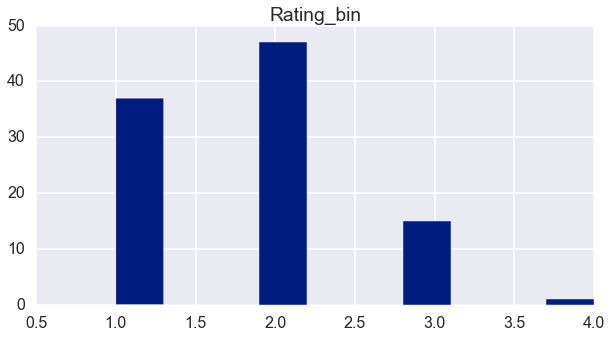

In [54]:
figsize = (10,5)
df3.hist('Rating_bin', figsize = figsize)

In [55]:
df3.dropna()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Rating_bin
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,2
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,2
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,3
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,3
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,2
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00,2
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00,2
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08 00:00:00,3
10,Star Trek Into Darkness,190000000.0,228778661,J.J. Abrams,PG-13,123,2013-05-16 00:00:00,2
11,Thor: The Dark World,170000000.0,206362140,Alan Taylor,PG-13,120,2013-11-08 00:00:00,2


In [56]:
y, X = np.ravel(df3[['Rating_bin']]), df3[['Rating_bin', 'DomesticTotalGross']]

In [57]:
logreg3 = LogisticRegression(C=10)
KNN3 = KNeighborsClassifier(n_neighbors=6)

In [58]:
lr3_cross_val = cross_val_score(logreg3, X, y)
KNN3_cross_val = cross_val_score(KNN3, X, y)

/Users/whitneychia/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


In [59]:
print 'The accuracy through cross_val for logistic regression is: ' + str(np.mean(lr_cross_val))
print 'The accuracy through cross_val for KNN is: ' + str(np.mean(knn_cross_val))

The accuracy through cross_val for logistic regression is: 0.689455510068
The accuracy through cross_val for KNN is: 0.924137931034


In [60]:
df3['all_PG13'] = [2 for x in df3['Rating_bin']]

In [61]:
print 'the accuracy_score of the dummy prediction is: ' + str(accuracy_score(df3['Rating_bin'], df3['all_PG13']))
print 'Both KNN and logistic regression perform better than the dummy prediction'

the accuracy_score of the dummy prediction is: 0.47
Both KNN and logistic regression perform better than the dummy prediction


In [62]:
logreg3.fit(X, y)
logreg3.coef_

array([[ -4.25276186e-16,  -7.03183167e-09],
       [  1.27804807e-17,   4.71945999e-10],
       [ -2.45583971e-16,  -1.03876992e-08],
       [ -3.32708440e-15,  -4.73607155e-08]])

This would suggest that an important feature is DomesticTotalGross and that Budget doesn't matter at all.

# <a id='question12'></a>
# Question 12  
[Top](#top)

In [63]:
df4 = pd.read_csv('haberman.data', header=None)

In [64]:
df4.columns = ['age', 'year_operation', 'positive_nodes', 'survival_status']

In [65]:
df4.head()

,age,year_operation,positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [66]:
print 'The average age of all patients is ' + str(df4['age'].mean())\
+ ' and the standard deviation is ' + str(df4['age'].std())

The average age of all patients is 52.4575163399 and the standard deviation is 10.8034523493


In [67]:
over_5 = df4[df4['survival_status'] == 1]
print 'The average age of patients that live longer than 5 years is ' + str(over_5['age'].mean())\
+ ' and the standard deviation is ' + str(over_5['age'].std())

The average age of patients that live longer than 5 years is 52.0177777778 and the standard deviation is 11.0121541799


In [68]:
less_5 = df4[df4['survival_status'] == 2]
print 'The average age of patients that live fewer than 5 years is ' + str(less_5['age'].mean())\
+ ' and the standard deviation is ' + str(less_5['age'].std())

The average age of patients that live fewer than 5 years is 53.6790123457 and the standard deviation is 10.1671372083


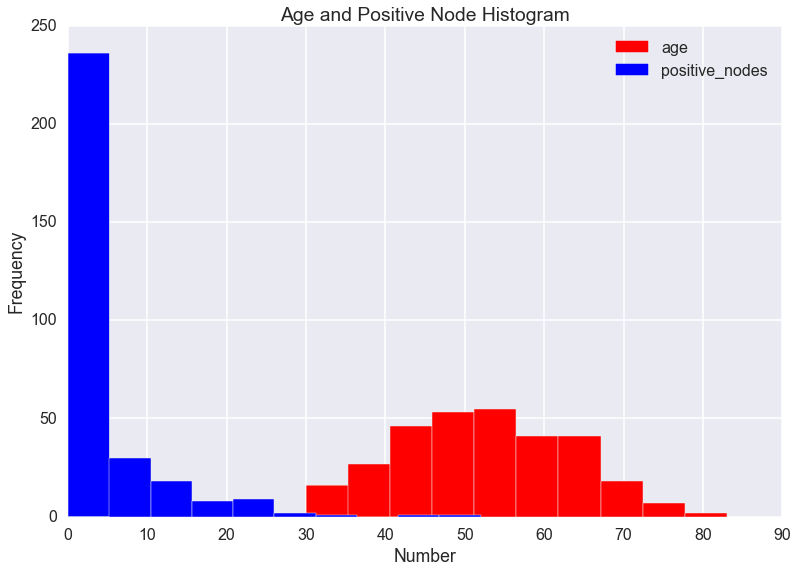

In [69]:
plt.legend(handles=[red, blue], loc = 0 )
plt.hist(df4['age'], color = 'red')
plt.title("Age and Positive Node Histogram")
red = mpatches.Patch(color='red', label='age')
blue = mpatches.Patch(color='blue', label='positive_nodes')
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.hist(df4['positive_nodes'], color = 'blue')
plt.legend(handles=[red, blue], loc='best')

In [70]:
print 'The earliest year of surgery in the dataset was 19' + str(df4['year_operation'].min())
print 'The latest year of surgery in the dataset was 19' + str(df4['year_operation'].max())

The earliest year of surgery in the dataset was 1958
The latest year of surgery in the dataset was 1969


In [71]:
y, X = dmatrices('survival_status ~ age + year_operation + positive_nodes', data=df4, return_type='dataframe')

In [72]:
x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=.30, random_state=4444)

In [73]:
logreg_UCI = LogisticRegression()
logreg_UCI.fit(x_train, y_train)
pred_UCI = logreg_UCI.predict(x_test)
print 'the accuracy_score of logistic regression is: ' + str(accuracy_score(y_test, pred_UCI))

the accuracy_score of logistic regression is: 0.815217391304


/Users/whitneychia/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
logreg_UCI.coef_

array([[-0.22616426,  0.01571678, -0.02588034,  0.07139464]])

This suggests that the most important feature is the last one, which is positive nodes.

In [76]:
log_learn_hab = learning_curve(logreg_UCI, df.values[:,1:], df.values[:,0], train_sizes = np.linspace(0.1, 1.0, 80))
log_learn_hab

(array([ 29,  32,  35,  38,  42,  45,  48,  52,  55,  58,  62,  65,  68,
         71,  75,  78,  81,  85,  88,  91,  95,  98, 101, 104, 108, 111,
        114, 118, 121, 124, 128, 131, 134, 138, 141, 144, 147, 151, 154,
        157, 161, 164, 167, 171, 174, 177, 180, 184, 187, 190, 194, 197,
        200, 204, 207, 210, 214, 217, 220, 223, 227, 230, 233, 237, 240,
        243, 247, 250, 253, 256, 260, 263, 266, 270, 273, 276, 280, 283,
        286, 290]), array([[ 1.        ,  0.96551724,  0.96551724],
        [ 1.        ,  0.96875   ,  0.96875   ],
        [ 1.        ,  0.97142857,  0.97142857],
        [ 1.        ,  0.97368421,  0.97368421],
        [ 1.        ,  0.97619048,  0.97619048],
        [ 1.        ,  0.97777778,  0.97777778],
        [ 1.        ,  0.97916667,  0.97916667],
        [ 1.        ,  0.98076923,  0.98076923],
        [ 1.        ,  0.98181818,  0.98181818],
        [ 1.        ,  0.98275862,  0.98275862],
        [ 1.        ,  0.98387097,  0.98387097],
    

In [77]:
train_cv_log_reg_err = np.mean(log_learn_hab[1], axis=1)
test_cv_log_reg_err = np.mean(log_learn_hab[2], axis=1)
m = log_learn_hab[0]

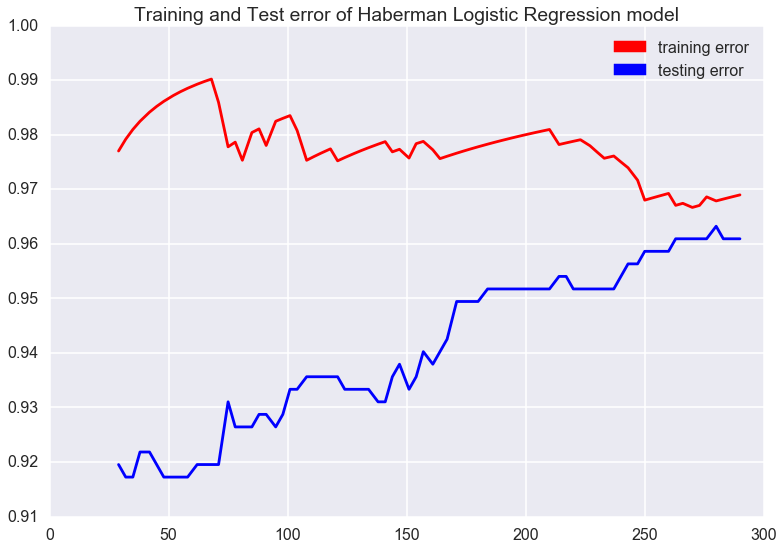

In [78]:
plt.plot(m, train_cv_log_reg_err, 'red')
plt.plot(m, test_cv_log_reg_err, 'blue')
red = mpatches.Patch(color='red', label='training error')
blue = mpatches.Patch(color='blue', label='testing error')
plt.legend(handles=[red, blue], loc = 0 )
plt.title('Training and Test error of Haberman Logistic Regression model')